In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [544]:
#Input the dataset
ethereum = pd.read_csv('ethereum_price.csv')

In [545]:
#Display the dataset
ethereum.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",298.57,304.84,290.77,294.66,"5407,66,000","28,533,300,000"
1,"Nov 06, 2017",296.43,305.42,293.72,298.89,"5793,59,000","28,322,700,000"
2,"Nov 05, 2017",300.04,301.37,295.12,296.26,"3376,58,000","28,661,500,000"
3,"Nov 04, 2017",305.48,305.48,295.80,300.47,"4164,79,000","29,175,300,000"
4,"Nov 03, 2017",288.50,308.31,287.69,305.71,"6463,40,000","27,547,400,000"


## Find missing values in data

In [546]:
#to check for missing values
ethereum.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [547]:
#to remove punctuation from the numeric data
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

ethereum["Volume"] = ethereum['Volume'].apply(remove_punctuations)
ethereum["Market Cap"] = ethereum['Market Cap'].apply(remove_punctuations)
ethereum.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",298.57,304.84,290.77,294.66,540766000,28533300000
1,"Nov 06, 2017",296.43,305.42,293.72,298.89,579359000,28322700000
2,"Nov 05, 2017",300.04,301.37,295.12,296.26,337658000,28661500000
3,"Nov 04, 2017",305.48,305.48,295.80,300.47,416479000,29175300000
4,"Nov 03, 2017",288.50,308.31,287.69,305.71,646340000,27547400000


In [548]:
#to find the data types of the features in the dataset
ethereum.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

In [549]:
#Converting the date column to datetime format
ethereum['Date'] = pd.to_datetime(ethereum['Date'])

In [550]:
#remove the extra spaces in the numeric data
ethereum["Volume"] = ethereum['Volume'].replace(' ', '')
ethereum["Market Cap"] = ethereum['Market Cap'].replace(' ', '')

In [551]:
#to convert the string data to float
ethereum['Volume'] = ethereum['Volume'].astype(float)
ethereum['Market Cap'] = ethereum['Market Cap'].astype(float)

In [552]:
#to make 'Date', the index of the dataframe
ethereum.set_index('Date', inplace=True)
ethereum.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-07,298.57,304.84,290.77,294.66,540766000.0,2.853330e+10
2017-11-06,296.43,305.42,293.72,298.89,579359000.0,2.832270e+10
2017-11-05,300.04,301.37,295.12,296.26,337658000.0,2.866150e+10
2017-11-04,305.48,305.48,295.80,300.47,416479000.0,2.917530e+10
2017-11-03,288.50,308.31,287.69,305.71,646340000.0,2.754740e+10


### VISUALIZATION OF THE DATA

<AxesSubplot:xlabel='Date'>

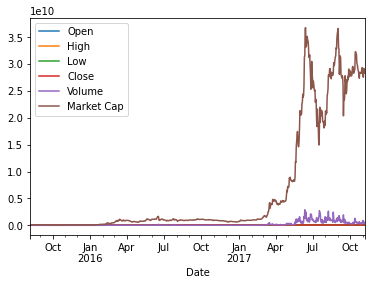

In [553]:
#plotting the features with respect to the date index
ethereum.plot()

### CHECKING THE STATIONARITY OF THE INDEPENDENT FEATURES

In [554]:
#dickey-fuller test
from statsmodels.tsa.stattools import adfuller
test_result_1 = adfuller(ethereum['Open'])
test_result_2 = adfuller(ethereum['High'])
test_result_3 = adfuller(ethereum['Close'])
test_result_4 = adfuller(ethereum['Low'])
test_result_5 = adfuller(ethereum['Volume'])
test_result_6 = adfuller(ethereum['Market Cap'])

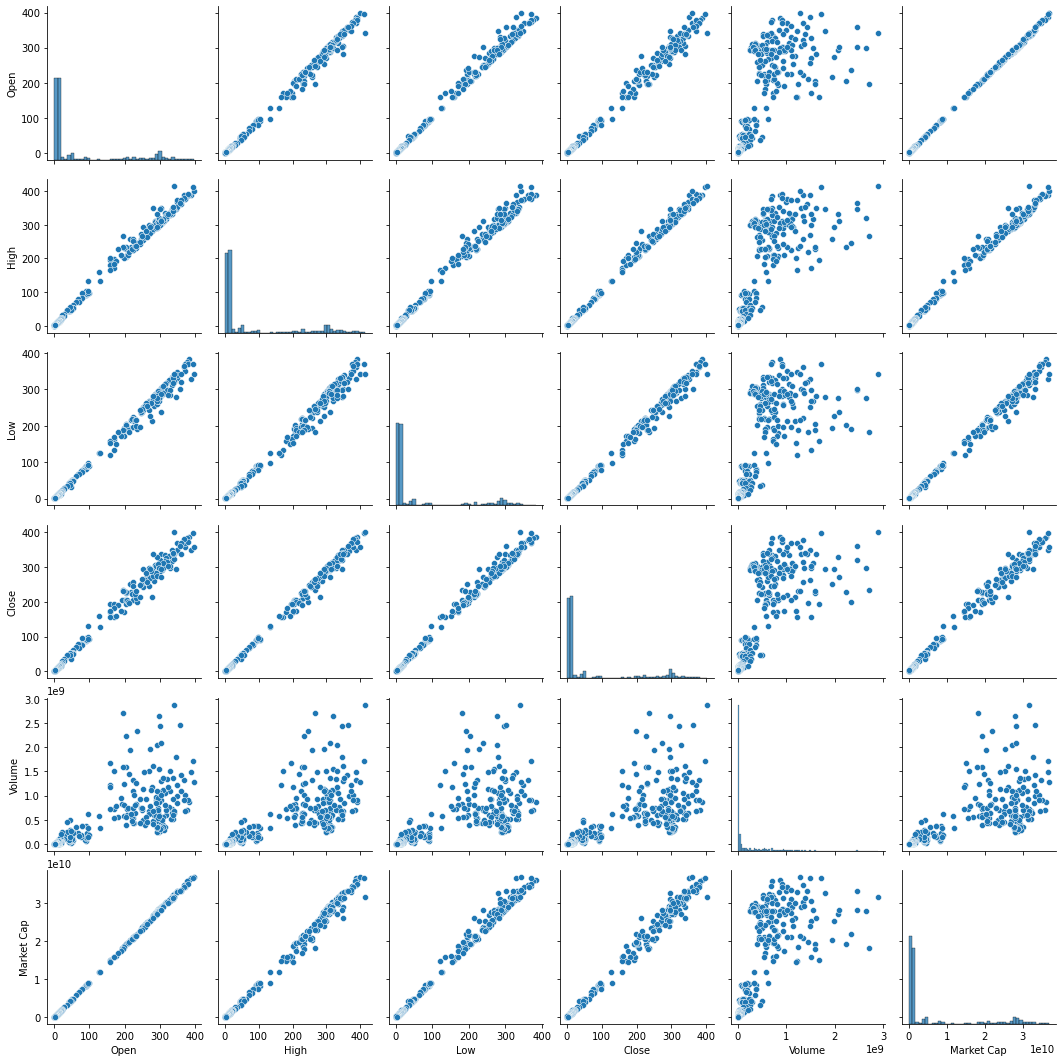

In [555]:
#checking the correlation between the independent features
sns.pairplot(ethereum)

In [556]:
#H0: It is non-stationary
#H1: It is stationary

def adfuller_test(feature):
    result = adfuller(feature)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label+ ' : ' +str(value))
    if result[1] <= 0.05:
        print('strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [557]:
adfuller_test(ethereum['Open'])

ADF Test Statistic : -2.620368475300741
p-value : 0.08886016416327497
#Lags Used : 20
Number of Observations Used : 803
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [558]:
adfuller_test(ethereum['High'])

ADF Test Statistic : -2.3811513019524377
p-value : 0.1471271340617577
#Lags Used : 20
Number of Observations Used : 803
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [559]:
adfuller_test(ethereum['Close'])

ADF Test Statistic : -2.543337538963743
p-value : 0.10528265183369961
#Lags Used : 20
Number of Observations Used : 803
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [560]:
adfuller_test(ethereum['Low'])

ADF Test Statistic : -2.4484443444051647
p-value : 0.1285273677190248
#Lags Used : 20
Number of Observations Used : 803
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [564]:
adfuller_test(ethereum['Volume'])

ADF Test Statistic : -1.1561911243285015
p-value : 0.692151777133712
#Lags Used : 21
Number of Observations Used : 802
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


In [565]:
adfuller_test(ethereum['Market Cap'])

ADF Test Statistic : -2.633088053352478
p-value : 0.08634963029073345
#Lags Used : 20
Number of Observations Used : 803
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


### Differencing

To convert the non-stationary data to stationary by finding out the first order difference. The shift is taken to be '3' as 3 months is the difference considered.

In [566]:
ethereum['Open First Difference'] = ethereum['Open'] - ethereum['Open'].shift(1)

In [567]:
ethereum['High First Difference'] = ethereum['High'] - ethereum['High'].shift(1)

In [568]:
ethereum['Close First Difference'] = ethereum['Close'] - ethereum['Close'].shift(1)

In [569]:
ethereum['Low First Difference'] = ethereum['Low'] - ethereum['Low'].shift(1)

In [570]:
ethereum['Volume First Difference'] = ethereum['Volume'] - ethereum['Volume'].shift(1)

In [571]:
ethereum['Market Cap First Difference'] = ethereum['Market Cap'] - ethereum['Market Cap'].shift(1)

retake the dickey-fuller test to check if all the features are stationary

In [572]:
adfuller_test(ethereum['Open First Difference'].dropna())

ADF Test Statistic : -4.7021410071264835
p-value : 8.337689729038647e-05
#Lags Used : 20
Number of Observations Used : 802
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [573]:
adfuller_test(ethereum['Close First Difference'].dropna())

ADF Test Statistic : -4.485245782466154
p-value : 0.00020906971320361432
#Lags Used : 19
Number of Observations Used : 803
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [574]:
adfuller_test(ethereum['Low First Difference'].dropna())

ADF Test Statistic : -4.627673001652166
p-value : 0.00011482004001516966
#Lags Used : 20
Number of Observations Used : 802
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [575]:
adfuller_test(ethereum['High First Difference'].dropna())

ADF Test Statistic : -4.3776317849989415
p-value : 0.00032508983132611415
#Lags Used : 21
Number of Observations Used : 801
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [576]:
adfuller_test(ethereum['Volume First Difference'].dropna())

ADF Test Statistic : -8.245428335231137
p-value : 5.570808547478413e-13
#Lags Used : 21
Number of Observations Used : 801
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [577]:
adfuller_test(ethereum['Market Cap First Difference'].dropna())

ADF Test Statistic : -4.699404901626347
p-value : 8.43696601395214e-05
#Lags Used : 20
Number of Observations Used : 802
strong evidence against the null hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary


In [578]:
ethereum.head(14)

,Open,High,Low,Close,Volume,Market Cap,Open First Difference,High First Difference,Close First Difference,Low First Difference,Volume First Difference,Market Cap First Difference
Date,,,,,,,,,,,,
2017-11-07,298.57,304.84,290.77,294.66,540766000.0,2.853330e+10,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,296.43,305.42,293.72,298.89,579359000.0,2.832270e+10,-2.14,0.58,4.23,2.95,38593000.0,-2.106000e+08
2017-11-05,300.04,301.37,295.12,296.26,337658000.0,2.866150e+10,3.61,-4.05,-2.63,1.40,-241701000.0,3.388000e+08
2017-11-04,305.48,305.48,295.80,300.47,416479000.0,2.917530e+10,5.44,4.11,4.21,0.68,78821000.0,5.138000e+08
2017-11-03,288.50,308.31,287.69,305.71,646340000.0,2.754740e+10,-16.98,2.83,5.24,-8.11,229861000.0,-1.627900e+09
2017-11-02,290.73,293.91,281.17,287.43,904901000.0,2.775420e+10,2.23,-14.40,-18.28,-6.52,258561000.0,2.068000e+08
2017-11-01,305.76,306.40,290.58,291.69,553864000.0,2.918360e+10,15.03,12.49,4.26,9.41,-351037000.0,1.429400e+09
2017-10-31,307.38,310.55,305.88,305.88,369583000.0,2.933150e+10,1.62,4.15,14.19,15.30,-184281000.0,1.479000e+08
2017-10-30,304.78,310.50,304.35,307.75,331442000.0,2.907760e+10,-2.60,-0.05,1.87,-1.53,-38141000.0,-2.539000e+08


Plot the first difference of each feature

<AxesSubplot:xlabel='Date'>

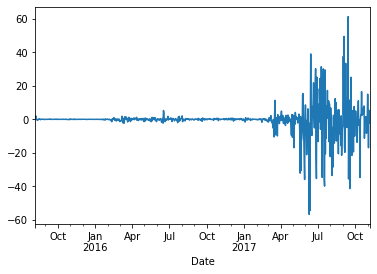

In [579]:
ethereum['Open First Difference'].plot()

<AxesSubplot:xlabel='Date'>

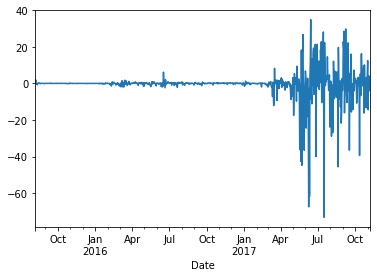

In [580]:
ethereum['High First Difference'].plot()

<AxesSubplot:xlabel='Date'>

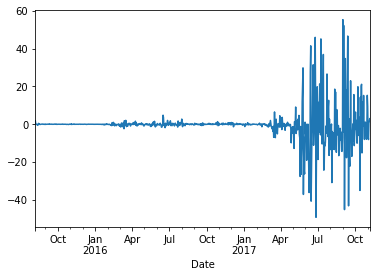

In [581]:
ethereum['Low First Difference'].plot()

<AxesSubplot:xlabel='Date'>

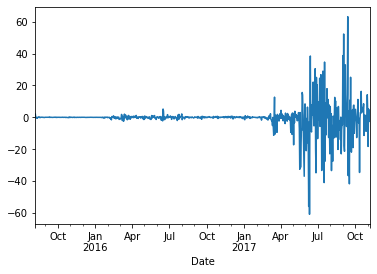

In [582]:
ethereum['Close First Difference'].plot()

<AxesSubplot:xlabel='Date'>

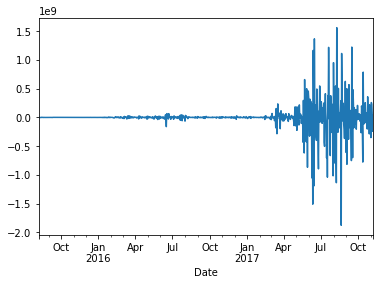

In [583]:
ethereum['Volume First Difference'].plot()

<AxesSubplot:xlabel='Date'>

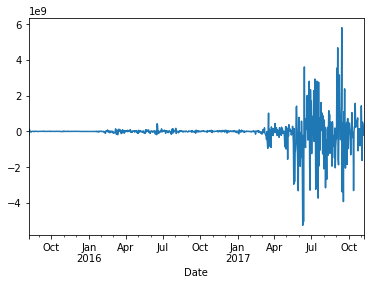

In [584]:
ethereum['Market Cap First Difference'].plot()

### AutoRegressive Model

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

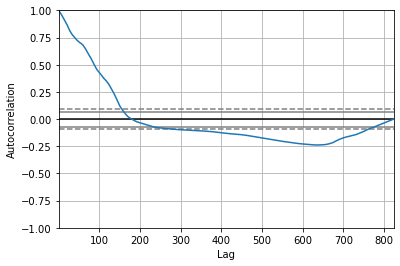

In [585]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['Open'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

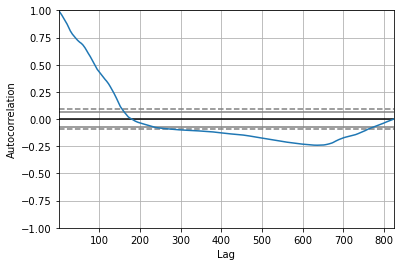

In [586]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['High'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

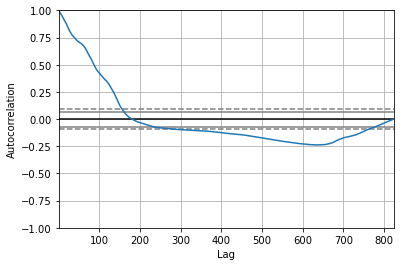

In [587]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['Low'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

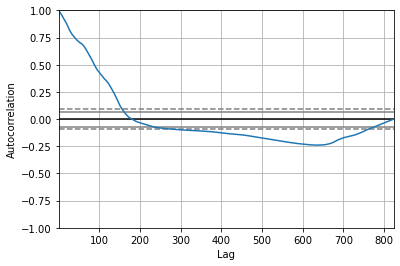

In [588]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

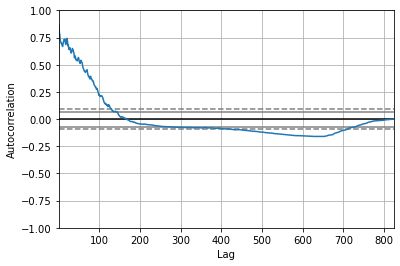

In [589]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['Volume'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

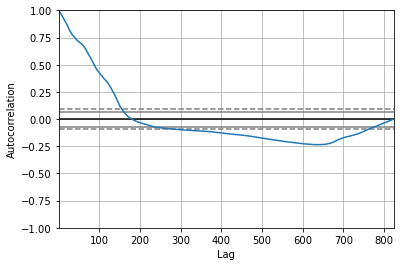

In [590]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ethereum['Market Cap'])

In [591]:
ethereum.head(200)

,Open,High,Low,Close,Volume,Market Cap,Open First Difference,High First Difference,Close First Difference,Low First Difference,Volume First Difference,Market Cap First Difference
Date,,,,,,,,,,,,
2017-11-07,298.57,304.84,290.77,294.66,540766000.0,2.853330e+10,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-06,296.43,305.42,293.72,298.89,579359000.0,2.832270e+10,-2.14,0.58,4.23,2.95,38593000.0,-2.106000e+08
2017-11-05,300.04,301.37,295.12,296.26,337658000.0,2.866150e+10,3.61,-4.05,-2.63,1.40,-241701000.0,3.388000e+08
2017-11-04,305.48,305.48,295.80,300.47,416479000.0,2.917530e+10,5.44,4.11,4.21,0.68,78821000.0,5.138000e+08
2017-11-03,288.50,308.31,287.69,305.71,646340000.0,2.754740e+10,-16.98,2.83,5.24,-8.11,229861000.0,-1.627900e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-26,49.91,53.44,49.91,52.72,104884000.0,4.544370e+09,-2.90,-8.73,-9.45,-2.38,-141891000.0,-2.652600e+08
2017-04-25,50.07,50.30,49.81,49.89,38264600.0,4.557870e+09,0.16,-3.14,-2.83,-0.10,-66619400.0,1.350000e+07
2017-04-24,48.87,50.18,48.87,50.03,55580600.0,4.446470e+09,-1.20,-0.12,0.14,-0.94,17316000.0,-1.114000e+08


In [592]:
#autocorrelation and partial autocorrelation. These two factors will help to decide the values of 'p' and 'q'
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

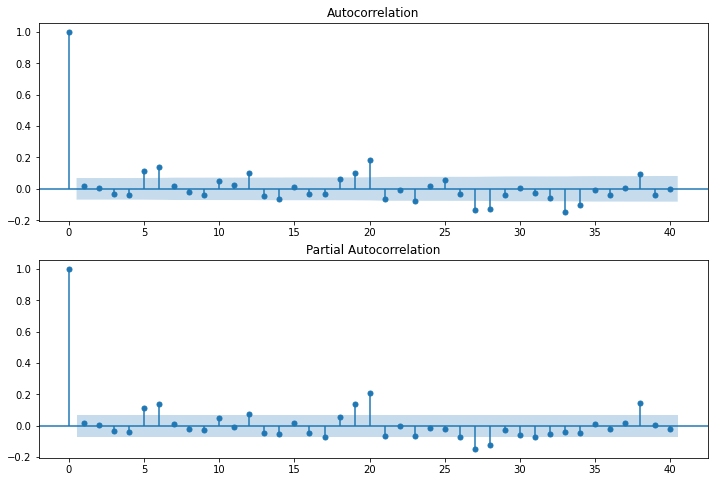

In [619]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['Open First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['Open First Difference'].iloc[13:], lags=40, ax=ax2)

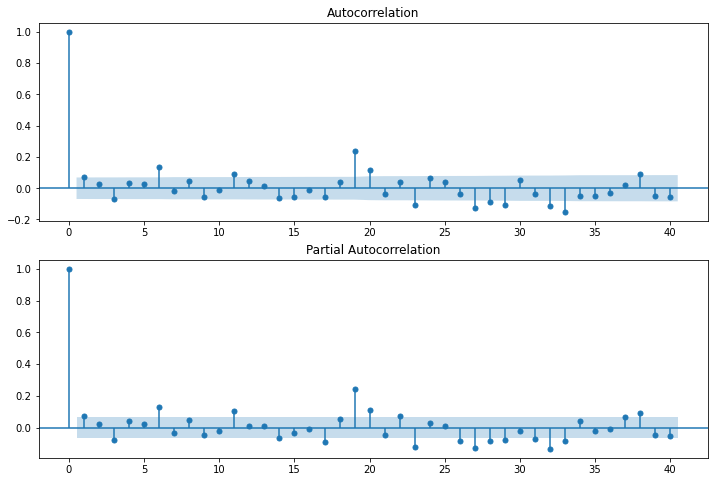

In [620]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['High First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['High First Difference'].iloc[13:], lags=40, ax=ax2)

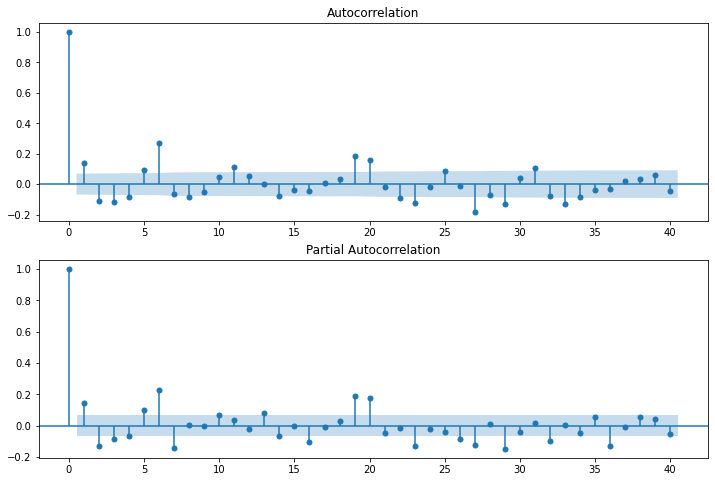

In [621]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['Low First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['Low First Difference'].iloc[13:], lags=40, ax=ax2)

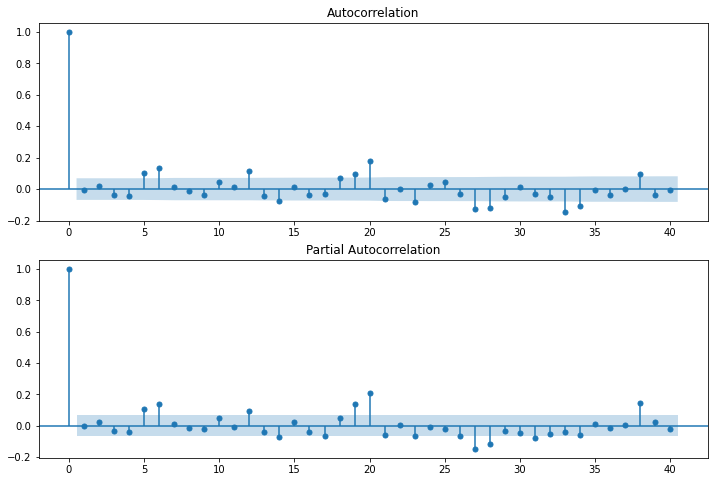

In [622]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['Close First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['Close First Difference'].iloc[13:], lags=40, ax=ax2)

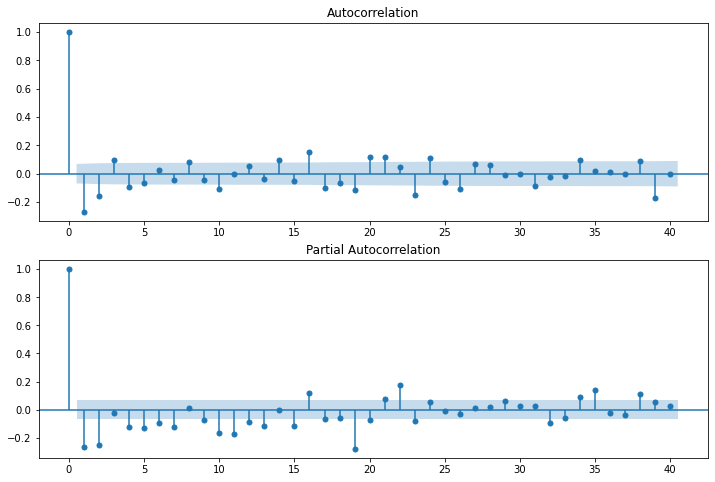

In [623]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['Volume First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['Volume First Difference'].iloc[13:], lags=40, ax=ax2)

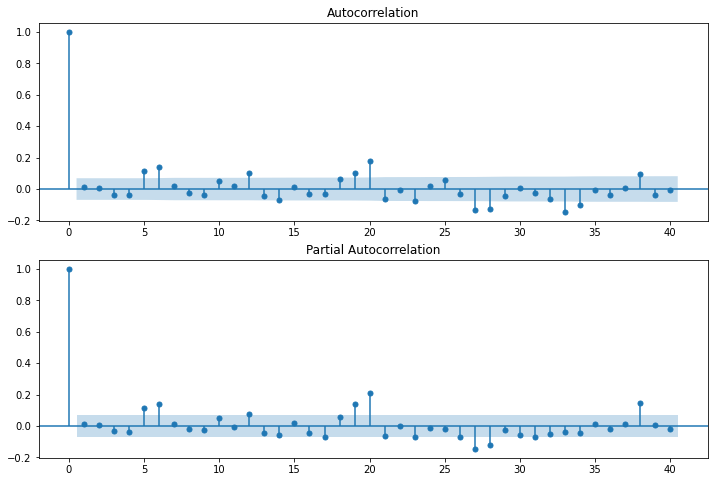

In [624]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsaplots.plot_acf(ethereum['Market Cap First Difference'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsaplots.plot_pacf(ethereum['Market Cap First Difference'].iloc[13:], lags=40, ax=ax2)

### ARIMA

Since the data is not seasonal, we will use ARIMA model to predict our data, by fitting each feature in to the model

In [644]:
from statsmodels.tsa.arima_model import ARIMA

In [645]:
#Feature: Open
#p = 1, d = 0, q = 3
model_Open=ARIMA(ethereum['Open'],order=(1,0,3))
model_Open_fit=model_Open.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [646]:
model_Open_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   Open   No. Observations:                  824
Model:                     ARMA(1, 3)   Log Likelihood               -2887.585
Method:                       css-mle   S.D. of innovations              8.020
Date:                Sat, 06 Nov 2021   AIC                           5787.169
Time:                        05:27:34   BIC                           5815.454
Sample:                             0   HQIC                          5798.020
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.2695    104.501      1.113      0.266     -88.548     321.087
ar.L1.Open     0.9982      0.002    573.290      0.000       0.995       1.002
ma.L1.Open     0.0155      0.035      0.445      0.656      -0.053       0.084
ma.L2.Open     0.0111      0.037      0.299      0.765      -0.062       0.084
ma.L3.Open    -0.0259      0.032     -0.820      0.412      -0.088       0.036
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0018           +0.0000j            1.0018            0.0000
MA.1           -1.5815           -2.8731j            3.2796           -0.3301
MA.2           -1.5815           +2.8731j            3.2796            0.3301
MA.3            3.5903           -0.0000j            3.5903           -0.0000
-----------------------------------------------------------------------------
"""

In [647]:
#Feature = High
#p = 1, d = 0, q = 1
model_High=ARIMA(ethereum['High'],order=(1,0,1))
model_High_fit=model_High.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [648]:
model_High_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   High   No. Observations:                  824
Model:                     ARMA(1, 1)   Log Likelihood               -2880.244
Method:                       css-mle   S.D. of innovations              7.949
Date:                Sat, 06 Nov 2021   AIC                           5768.488
Time:                        05:27:36   BIC                           5787.345
Sample:                             0   HQIC                          5775.722
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        117.6963    104.776      1.123      0.261     -87.660     323.053
ar.L1.High     0.9981      0.002    551.216      0.000       0.995       1.002
ma.L1.High     0.0667      0.033      1.993      0.046       0.001       0.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0019           +0.0000j            1.0019            0.0000
MA.1          -14.9917           +0.0000j           14.9917            0.5000
-----------------------------------------------------------------------------
"""

In [649]:
#Feature: Low
#p = 1, d = 0, q = 1
model_Low=ARIMA(ethereum['Low'],order=(1,0,1))
model_Low_fit=model_Low.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [631]:
model_Low_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    Low   No. Observations:                  824
Model:                     ARMA(1, 1)   Log Likelihood               -2911.522
Method:                       css-mle   S.D. of innovations              8.258
Date:                Sat, 06 Nov 2021   AIC                           5831.043
Time:                        05:26:13   BIC                           5849.900
Sample:                             0   HQIC                          5838.277
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5943     84.977      1.196      0.232     -64.958     268.147
ar.L1.Low      0.9970      0.003    395.821      0.000       0.992       1.002
ma.L1.Low      0.1806      0.037      4.906      0.000       0.108       0.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0030           +0.0000j            1.0030            0.0000
MA.1           -5.5386           +0.0000j            5.5386            0.5000
-----------------------------------------------------------------------------
"""

In [632]:
#Feature = Close
#p = 1, d = 0, q = 1
model_Close=ARIMA(ethereum['Close'],order=(1,0,1))
model_Close_fit=model_Close.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [633]:
model_Close_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  824
Model:                     ARMA(1, 1)   Log Likelihood               -2903.599
Method:                       css-mle   S.D. of innovations              8.178
Date:                Sat, 06 Nov 2021   AIC                           5815.198
Time:                        05:26:15   BIC                           5834.055
Sample:                             0   HQIC                          5822.432
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         113.9713    101.835      1.119      0.263     -85.621     313.564
ar.L1.Close     0.9981      0.002    556.448      0.000       0.995       1.002
ma.L1.Close    -0.0037      0.034     -0.108      0.914      -0.071       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0019           +0.0000j            1.0019            0.0000
MA.1          269.8976           +0.0000j          269.8976            0.0000
-----------------------------------------------------------------------------
"""

In [634]:
#Feature: Volume
#p = 1, d = 0, q = 1
model_Volume=ARIMA(ethereum['Volume'],order=(1,0,1))
model_Volume_fit=model_Volume.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [635]:
model_Volume_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  824
Model:                     ARMA(1, 1)   Log Likelihood              -16946.065
Method:                       css-mle   S.D. of innovations      206482209.391
Date:                Sat, 06 Nov 2021   AIC                          33900.129
Time:                        05:26:17   BIC                          33918.986
Sample:                             0   HQIC                         33907.363
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.066e+08   8.59e+07      2.404      0.016    3.81e+07    3.75e+08
ar.L1.Volume     0.9506      0.013     74.544      0.000       0.926       0.976
ma.L1.Volume    -0.3967      0.046     -8.630      0.000      -0.487      -0.307
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0520           +0.0000j            1.0520            0.0000
MA.1            2.5207           +0.0000j            2.5207            0.0000
-----------------------------------------------------------------------------
"""

In [636]:
#Feature: Market Cap
#p = 1, d = 0, q = 1
model_MarketCap=ARIMA(ethereum['Market Cap'],order=(1,0,2))
model_MarketCap_fit=model_MarketCap.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency -1D w

In [637]:
model_MarketCap_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:             Market Cap   No. Observations:                  824
Model:                     ARMA(1, 2)   Log Likelihood              -18010.544
Method:                       css-mle   S.D. of innovations      749582634.866
Date:                Sat, 06 Nov 2021   AIC                          36031.089
Time:                        05:26:21   BIC                          36054.659
Sample:                             0   HQIC                         36040.131
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6.383e+09   1.17e+10      0.548      0.584   -1.65e+10    2.92e+10
ar.L1.Market Cap     0.9983      0.002    509.538      0.000       0.995       1.002
ma.L1.Market Cap     0.0150      0.035      0.430      0.668      -0.054       0.084
ma.L2.Market Cap     0.0049      0.037      0.134      0.893      -0.067       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0017           +0.0000j            1.0017            0.0000
MA.1           -1.5305          -14.1820j           14.2644           -0.2671
MA.2           -1.5305          +14.1820j           14.2644            0.2671
-----------------------------------------------------------------------------
"""

Predict the in-sample values of the model for each feature of the dataset

<AxesSubplot:xlabel='Date'>

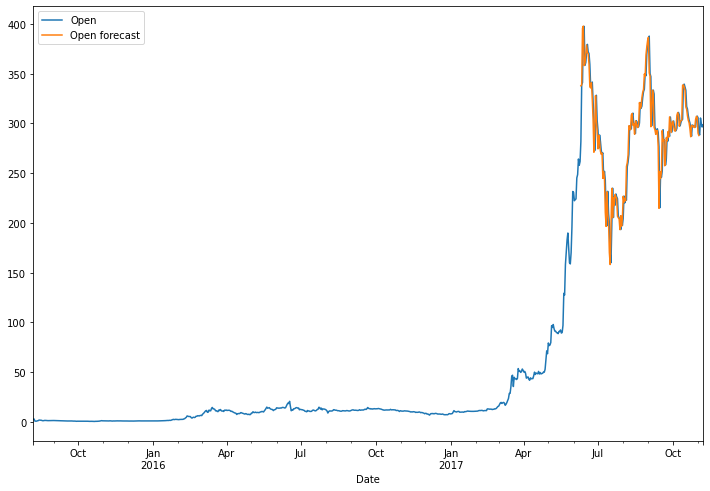

In [650]:
#to plot for start and end (the starting and ending datapoints of the dataset)
ethereum['Open forecast']=model_Open_fit.predict(start = 5, end = 150, dynamic=False)
ethereum[['Open','Open forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

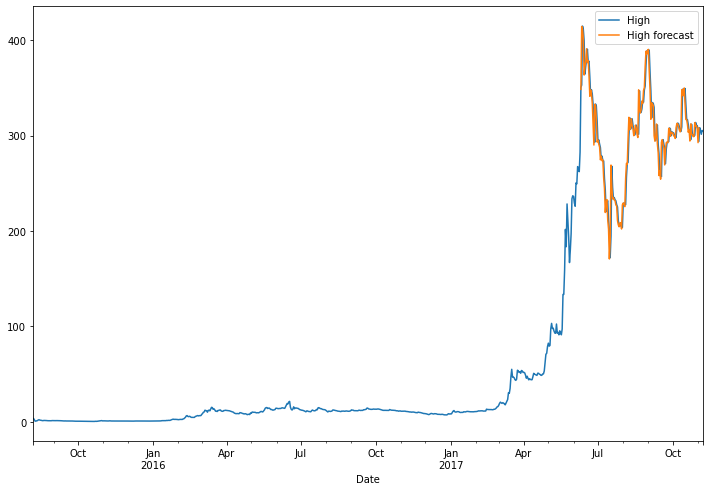

In [639]:
ethereum['High forecast']=model_High_fit.predict(start=5,end=150,dynamic=False)
ethereum[['High','High forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

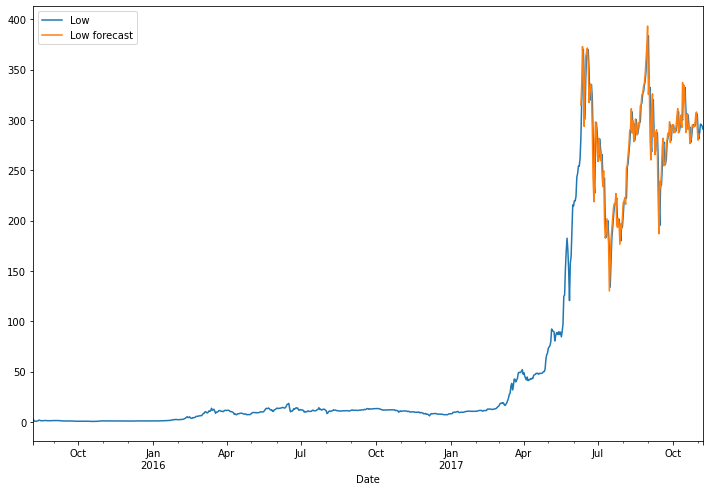

In [640]:
ethereum['Low forecast']=model_Low_fit.predict(start=5,end=150,dynamic=False)
ethereum[['Low','Low forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

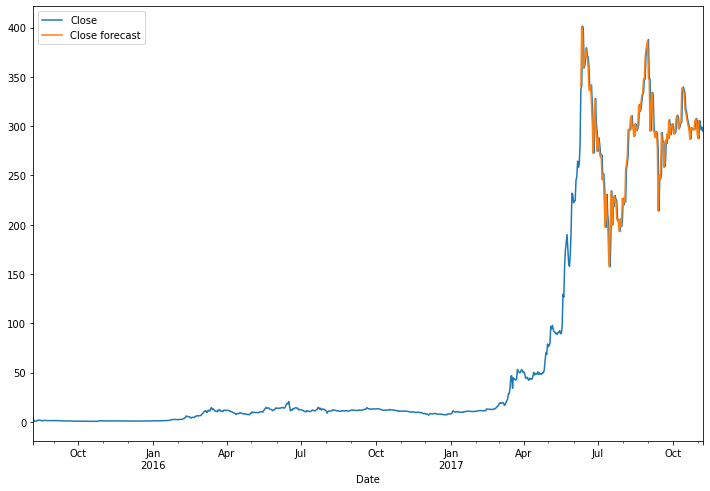

In [641]:
ethereum['Close forecast']=model_Close_fit.predict(start=5,end=150,dynamic=False)
ethereum[['Close','Close forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

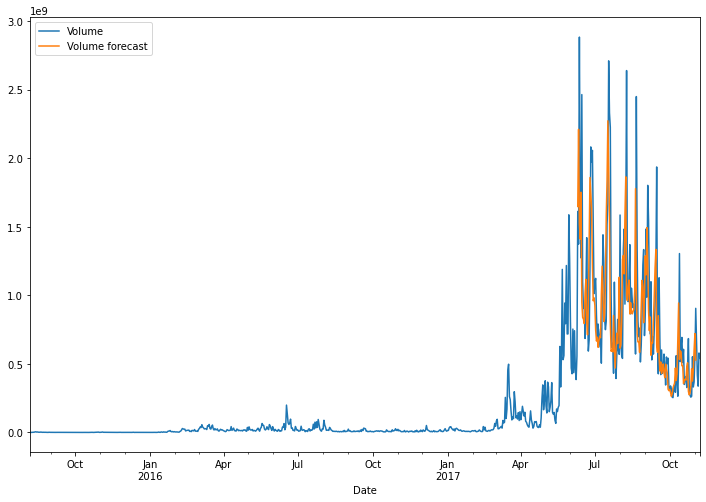

In [642]:
ethereum['Volume forecast']=model_Volume_fit.predict(start=5,end=150,dynamic=False)
ethereum[['Volume','Volume forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

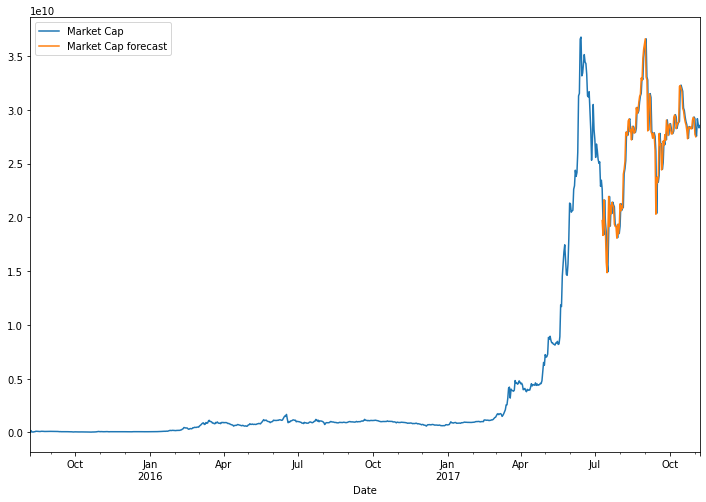

In [643]:
ethereum['Market Cap forecast']=model_MarketCap_fit.predict(start=5,end=120,dynamic=False)
ethereum[['Market Cap','Market Cap forecast']].plot(figsize=(12,8))